## Introduction

The main purpose of this project is to get a quick overview of the characteristic of the google play store app, try to generalize the characteristic of a good app, as well as getting the pricing strategy on the market

## The code

### Import libraries and load dataset

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [3]:
url = 'https://raw.githubusercontent.com/accidentallydoesnotwork/FinaL_Project_GoogleStore/master/googleplaystore.csv'
data = pd.read_csv(url)

In [7]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
927,Lifetime - Watch Full Episodes & Original Movies,ENTERTAINMENT,4.0,35928,19M,"1,000,000+",Free,0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up
9582,Stick 'Em Up 2 Starter Edition,GAME,3.8,2102,40M,"100,000+",Free,0,Everyone 10+,Action,"September 11, 2015",1.1.3,4.0.3 and up
10269,The 5th Stand,SPORTS,4.8,1697,17M,"100,000+",Free,0,Everyone,Sports,"July 31, 2018",1.2.677,4.4 and up
5281,AK 47 Assault Rifle Wallpapers,PERSONALIZATION,NaN,1,15M,100+,Free,0,Teen,Personalization,"February 22, 2018",1.0,4.1 and up
315,DC Comics,COMICS,4.2,25671,Varies with device,"1,000,000+",Free,0,Teen,Comics,"June 5, 2018",Varies with device,Varies with device
4047,Koi Live Wallpaper,PERSONALIZATION,4.6,14026,12M,"100,000+",Paid,$0.99,Everyone,Personalization,"June 24, 2014",1.9,2.2 and up
1726,Angry Birds Rio,GAME,4.4,2610622,46M,"100,000,000+",Free,0,Everyone,Arcade,"July 3, 2018",2.6.9,4.1 and up
2922,YouCam Makeup - Magic Selfie Makeovers,PHOTOGRAPHY,4.6,3337952,Varies with device,"100,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
877,Radio Javan,ENTERTAINMENT,4.4,46916,4.5M,"1,000,000+",Free,0,Everyone,Entertainment,"July 18, 2018",7.3,4.2 and up


In [8]:
data.shape

(10841, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**By the quick look of the data, we can see that there are 13 categories in this dataset and the longest is 10,841 rows.**
1. Ratings column has the most missing values. We have to clean them by remove or add avg to all these missing values. For the purpose of this project, app without rating should be drop.
2. The size column doesn't have consistent measurement values since they are in MB, KB... we need to convert them into one measurement value for the purpose of better analizing
3. Install should be in number format.

### Data Cleaning

In [13]:
# Remove all the app that has no rating available
data = data.dropna(subset = ['Rating'])
data.drop_duplicates(subset = 'App', inplace = True)

In [14]:
# Let's do a quick check, the amount of rows droped from more than 10,000 to 8,000.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8197 entries, 0 to 10840
Data columns (total 13 columns):
App               8197 non-null object
Category          8197 non-null object
Rating            8197 non-null float64
Reviews           8197 non-null object
Size              8197 non-null object
Installs          8197 non-null object
Type              8197 non-null object
Price             8197 non-null object
Content Rating    8196 non-null object
Genres            8197 non-null object
Last Updated      8197 non-null object
Current Ver       8193 non-null object
Android Ver       8194 non-null object
dtypes: float64(1), object(12)
memory usage: 896.5+ KB


In [15]:
data.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4740,Dictionary - WordWeb,BOOKS_AND_REFERENCE,4.6,124970,Varies with device,"5,000,000+",Free,0,Teen,Books & Reference,"May 26, 2018",Varies with device,Varies with device
10678,HAL-9000 - FN Theme,PERSONALIZATION,3.5,159,257k,"10,000+",Free,0,Everyone,Personalization,"August 16, 2013",1.0,2.2 and up
4438,OO Launcher for Android O 8.0 Oreo™ Launcher,PERSONALIZATION,4.4,14832,8.6M,"1,000,000+",Free,0,Everyone,Personalization,"August 3, 2018",4.6,4.0 and up
1694,Minion Rush: Despicable Me Official Game,GAME,4.5,10216538,Varies with device,"100,000,000+",Free,0,Everyone 10+,Casual;Action & Adventure,"July 12, 2018",Varies with device,Varies with device
1643,Keller Williams Real Estate,LIFESTYLE,4.4,13213,22M,"1,000,000+",Free,0,Everyone,Lifestyle,"March 28, 2018",5.800.04,4.0.3 and up
1178,Cookpad - FREE recipe search makes fun cooking...,FOOD_AND_DRINK,4.1,64784,13M,"10,000,000+",Free,0,Everyone,Food & Drink,"August 2, 2018",18.6.0.10,5.0 and up
3590,Baby Food - Homemade Recipes,PARENTING,4.1,44,3.6M,"10,000+",Free,0,Everyone,Parenting,"August 7, 2018",8.2,4.0.3 and up
7664,Permit Test CO Colorado DMV,FAMILY,4.5,41,11M,"1,000+",Free,0,Everyone,Education,"June 15, 2017",2.6.5,4.1 and up
6495,Word Hunt,GAME,4.9,59,21M,500+,Free,0,Everyone,Word,"June 22, 2018",1.0,4.4 and up
7463,CK 初一 十五,LIFESTYLE,4.0,294,153k,"10,000+",Free,0,Everyone,Lifestyle,"July 3, 2013",1.0.12,2.1 and up


In [29]:
# we remove all the character and replace ones without size with NaN for the purpose of easy dropping
data['Size'] = data['Size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: x.replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x.replace('k', ''))/1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [30]:
# drop the apps with NaN size 
data = data[data['Size'] != 'NaN']
data['Size'] = data['Size'].apply(lambda x: float(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7028 entries, 0 to 10840
Data columns (total 13 columns):
App               7028 non-null object
Category          7028 non-null object
Rating            7028 non-null float64
Reviews           7028 non-null object
Size              7028 non-null float64
Installs          7028 non-null object
Type              7028 non-null object
Price             7028 non-null object
Content Rating    7027 non-null object
Genres            7028 non-null object
Last Updated      7028 non-null object
Current Ver       7024 non-null object
Android Ver       7025 non-null object
dtypes: float64(2), object(11)
memory usage: 768.7+ KB


In [32]:
data.sample(10) # now we good to go with size

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5321,Al Quran (Tafsir & by Word),BOOKS_AND_REFERENCE,4.8,57400,14.000,"500,000+",Free,0,Everyone,Books & Reference,"July 30, 2018",1.6.5,4.0 and up
2890,Camera FV-5 Lite,PHOTOGRAPHY,4.0,130081,5.600,"10,000,000+",Free,0,Everyone,Photography,"November 10, 2017",3.31.4,4.0 and up
6465,Basket Manager 2017 Free,SPORTS,4.5,2710,4.800,"100,000+",Free,0,Everyone,Sports,"November 27, 2017",4.0,4.1 and up
7066,Sniper Gun Shot 3D: Impossible Missions,GAME,4.6,20,34.000,100+,Free,0,Mature 17+,Action,"May 4, 2018",1.0,4.0 and up
10749,FP Runner,GAME,3.7,38,29.000,"1,000+",Free,0,Everyone,Arcade,"June 29, 2016",1.12,3.1 and up
2097,My Little Pony Rainbow Runners,FAMILY,4.3,33785,16.000,"5,000,000+",Free,0,Everyone,Casual;Action & Adventure,"December 20, 2017",1.3,4.1 and up
10688,Fo File Manager,TOOLS,4.5,1916,0.364,"100,000+",Free,0,Everyone,Tools,"December 31, 2015",1.8.8,2.1 and up
8866,Dt Tracking,AUTO_AND_VEHICLES,4.0,4,24.000,100+,Free,0,Everyone,Auto & Vehicles,"October 28, 2016",0.20,4.0 and up
8633,To Do List,PRODUCTIVITY,4.7,253155,3.500,"5,000,000+",Free,0,Everyone,Productivity,"March 19, 2018",3.0.17,4.0 and up
7716,CQ Hotels,TRAVEL_AND_LOCAL,4.3,15,14.000,"10,000+",Free,0,Everyone,Travel & Local,"July 6, 2018",5.4.13,4.4 and up


In [41]:
# Converting the price to number as well
data['Price'] = data['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)
data['Price'] = data['Price'].apply(lambda x: x.replace('.', '') if '.' in str(x) else x)
data['Price'] = data['Price'].apply(lambda x: x.replace('Everyone', 'NaN') if 'Everyone' in str(x) else x)
data = data[data['Price'] != 'NaN']
data['Price'] = data['Price'].apply(lambda x: float(x)/100)

In [46]:
data['Reviews'] = data['Reviews'].apply(lambda x: float(x))
data.info()
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027 entries, 0 to 10840
Data columns (total 13 columns):
App               7027 non-null object
Category          7027 non-null object
Rating            7027 non-null float64
Reviews           7027 non-null float64
Size              7027 non-null float64
Installs          7027 non-null object
Type              7027 non-null object
Price             7027 non-null float64
Content Rating    7027 non-null object
Genres            7027 non-null object
Last Updated      7027 non-null object
Current Ver       7023 non-null object
Android Ver       7025 non-null object
dtypes: float64(4), object(9)
memory usage: 768.6+ KB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7465,F*ck This Game,GAME,4.6,8.0,6.300,100+,Paid,0.99,Teen,Action,"July 18, 2015",1.0.0,2.3 and up
4956,Safe Notes - Secure Ad-free notepad,PRODUCTIVITY,4.6,3362.0,0.756,"50,000+",Free,0.00,Everyone,Productivity,"November 21, 2017",1.7,4.0 and up
9565,OWLIE BOO,FAMILY,4.6,834.0,22.000,"100,000+",Free,0.00,Everyone,Puzzle;Education,"March 15, 2018",1.8.11,4.0 and up
3161,NTES,TRAVEL_AND_LOCAL,4.3,165299.0,5.400,"10,000,000+",Free,0.00,Everyone,Travel & Local,"July 30, 2018",8.0,4.1 and up
10258,Burnley FC,SPORTS,4.9,195.0,29.000,"5,000+",Free,0.00,Everyone,Sports,"August 1, 2018",2018.8.1,4.4 and up
7645,Websites.co.in Instant Website,BUSINESS,4.3,327.0,13.000,"10,000+",Free,0.00,Everyone,Business,"June 25, 2018",1.48,4.1 and up
706,Learn Spanish - Español,EDUCATION,4.7,32346.0,3.200,"1,000,000+",Free,0.00,Everyone,Education,"December 18, 2017",1.3.8,4.0 and up
2146,Earth to Luna! Watch and Play,FAMILY,3.9,10753.0,84.000,"1,000,000+",Free,0.00,Everyone,Educational;Education,"July 23, 2018",2.5.6,4.1 and up
5614,AT&T THANKS®,FAMILY,3.4,2445.0,34.000,"500,000+",Free,0.00,Everyone,Entertainment,"July 11, 2018",1.4.0,5.0 and up
5642,Two Nights at jumpscare,GAME,3.8,596.0,91.000,"100,000+",Free,0.00,Teen,Adventure,"August 17, 2017",1.0,4.1 and up


### Data visualization

#### Content rating visualization
- We can answer these questions by plotting out the data:
1. Which is the dominant categories on Google store?
2. Which cate should we aim at for our new app on Google store?

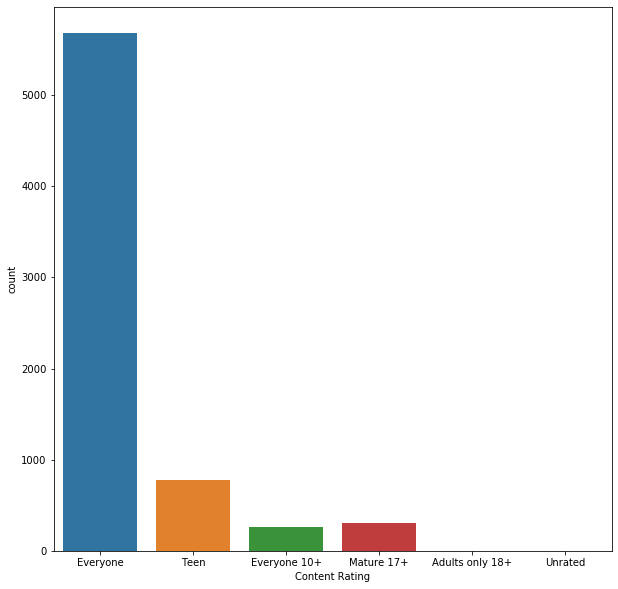

In [48]:
plt.figure(figsize=(10,10))
sns.countplot(data['Content Rating'])

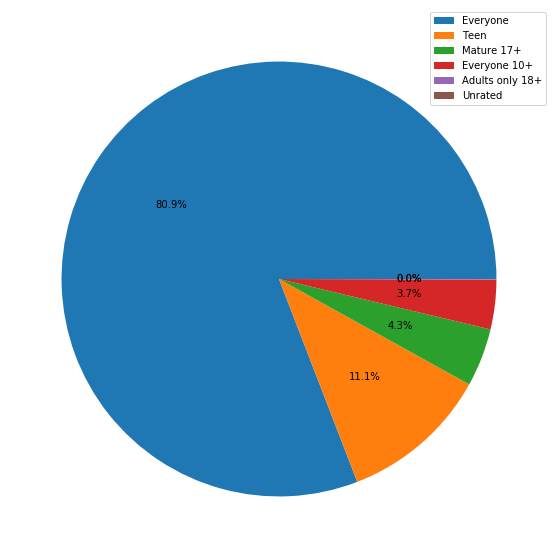

In [58]:
content = data['Content Rating'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(content, autopct='%.1f%%')
plt.legend(content.index)
plt.show()

As we can see, rating everyone is the most popular on Google store which occupied around 80% on the total ratings.

#### Categories visualization

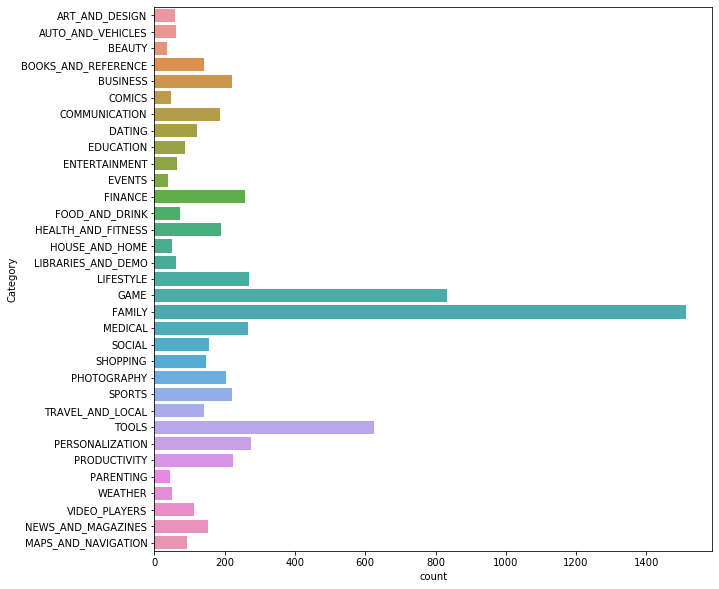

In [61]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['Category'])
plt.show()

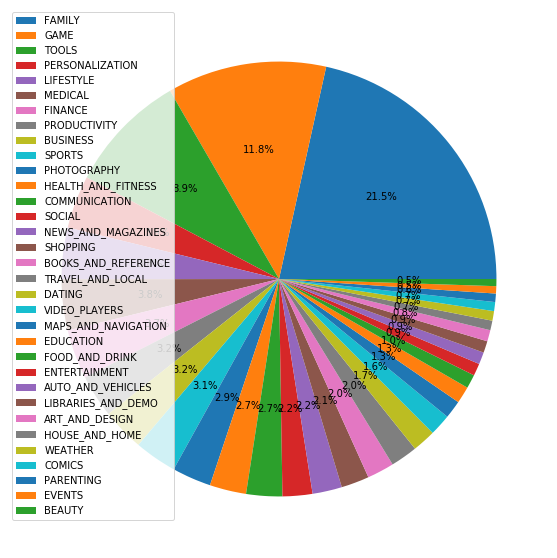

In [70]:
category = data['Category'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(category, autopct='%.1f%%')
plt.legend(category.index)
plt.show()

#### Finding interesting insights in the data

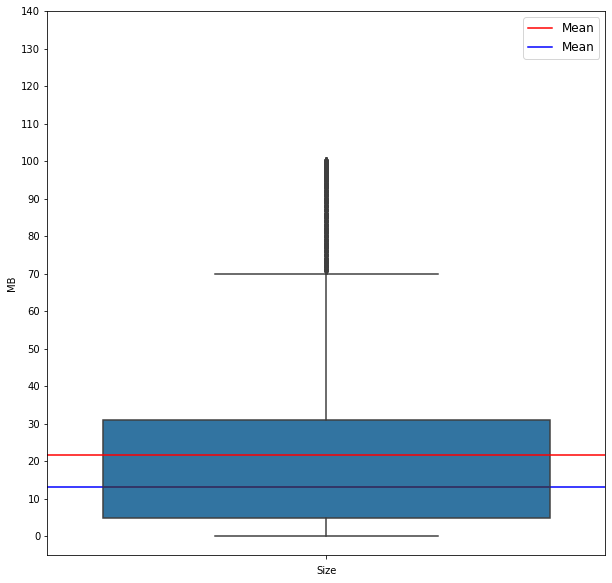

In [85]:
# What is the avg app size?
plt.figure(figsize=(10,10))
sns.boxplot(y='Size', data=data)
plt.ylabel('MB')
plt.xlabel('Size')
plt.yticks(np.arange(0,150, step=10))
plt.axhline(data['Size'].mean(), color ='r', label='Mean')
plt.axhline(data['Size'].median(), color ='b', label='Mean')
plt.legend(prop={'size':12})
plt.show()

**The sizing data alone tell us that**:
- As we can see from the data, the mean size for app is around 20 MB, the median size around 13MB.
- The 50% quartile size for app is within 5MB to 30MB. 
- 75% app within the range 0-30 MB
- The Upper Quartile (75th percentile) range is within 30MB to 70MB
- The outliers size will be > 70 MB

#### What is the relationship between size and categories? 

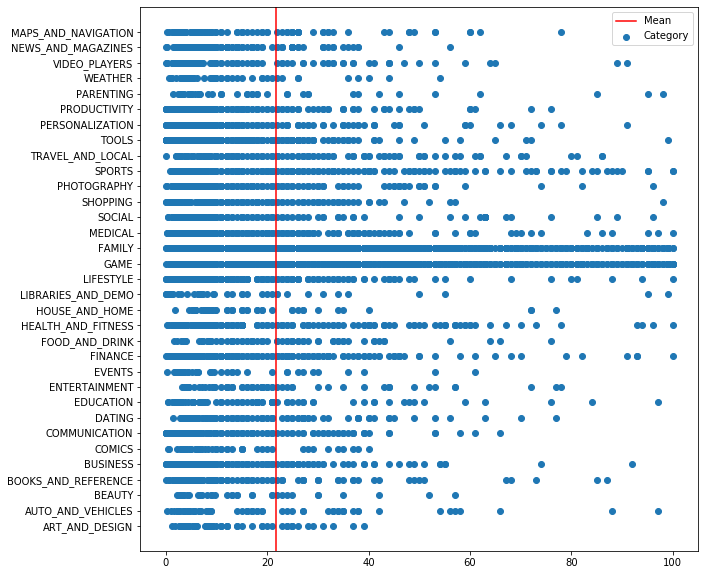

In [93]:
# first try to plot a scatter plot
plt.figure(figsize=(10,10))
plt.scatter(x='Size', y='Category', data=data)
plt.axvline(data['Size'].mean(), color='r', label='Mean')
plt.legend()
plt.show()

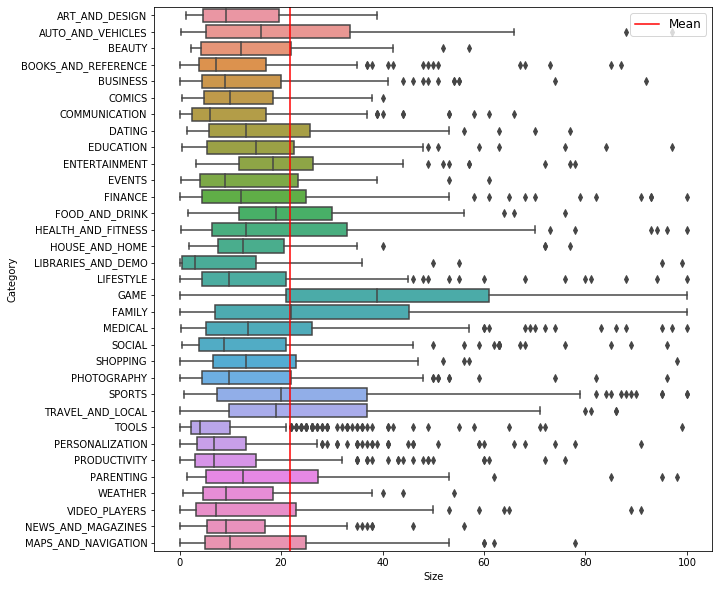

In [105]:
# second try with boxplot
plt.figure(figsize=(10,10))
sns.boxplot(y='Category', x='Size', data=data)
plt.axvline(data['Size'].mean(), color='r', label='Mean')
plt.legend(loc =1, prop={'size':12})
plt.show()

**From the look of the boxplot, we can easily see that:**
1. There are diversify sizing in different categories. For game and family apps, it's very normal to have large app size. The maximum size 100MB is just within their quartile box.
2. Art and design apps are so light that they don't even have outlier and all within 0-40MB
==> Based on our choice of categories, we know what we should expect in term of sizing for our app.

#### Go free or not 
Which is an important question to ask for a new app.

In [202]:
free = data[data['Price'] == 0]
not_free = data[data['Price'] > 0]
not_free.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4487,Pixel Oreo/P Dark White AMOLED UI - Icon Pack,PERSONALIZATION,4.8,18.0,16.0,"5,000+",Paid,1.49,Everyone,Personalization,"June 21, 2018",5.1,4.0.3 and up
2292,"End Anxiety Pro - Stress, Panic Attack Help",MEDICAL,4.2,33.0,53.0,"1,000+",Paid,3.99,Everyone,Medical,"May 8, 2018",2.29,4.2 and up
3039,Golfshot Plus: Golf GPS,SPORTS,4.1,3387.0,25.0,"50,000+",Paid,29.99,Everyone,Sports,"July 11, 2018",4.18.0,4.1 and up
5215,AI Draw | Art Filter for Selfie,PHOTOGRAPHY,3.0,20.0,4.3,"1,000+",Paid,2.99,Everyone,Photography,"June 18, 2018",1.4.7,5.0 and up
2173,SweetLand — Family Board Game,FAMILY,4.2,38.0,47.0,"1,000+",Paid,0.99,Everyone,Casual;Pretend Play,"November 14, 2014",1.2,2.3.3 and up


Text(0.5, 0, 'Price')

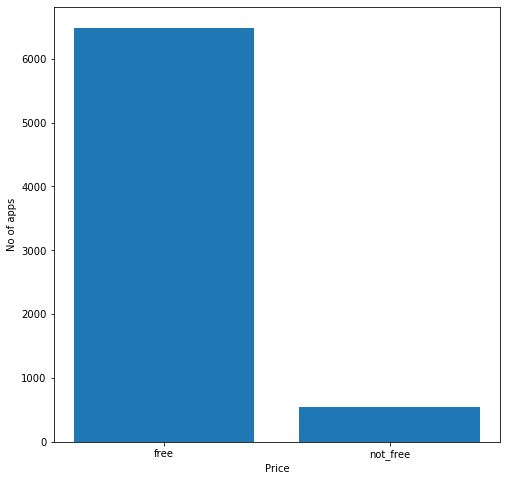

In [203]:
names = ['free', 'not_free']
values = [len(free), len(not_free)]
plt.figure(figsize=(8,8))
plt.bar(names, values)
plt.ylabel('No of apps')
plt.xlabel('Price')

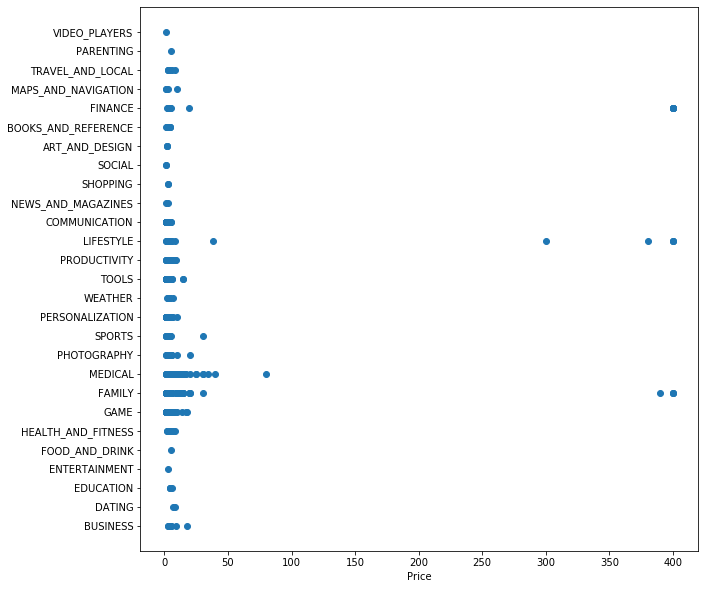

In [112]:
plt.figure(figsize=(10,10))
plt.scatter(x='Price', y='Category', data=not_free)
plt.xlabel('Price')
plt.show()
# we can see some outlier in term of pricing here, let's check which categories they are in.

In [142]:
expensive_app = data[data['Price'] >200]
expensive_app.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5354,I am Rich Plus,FAMILY,4.0,856.0,8.700,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41.000,"1,000+",Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,0.965,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.700,"1,000+",Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2.600,"10,000+",Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up


<function matplotlib.pyplot.show(*args, **kw)>

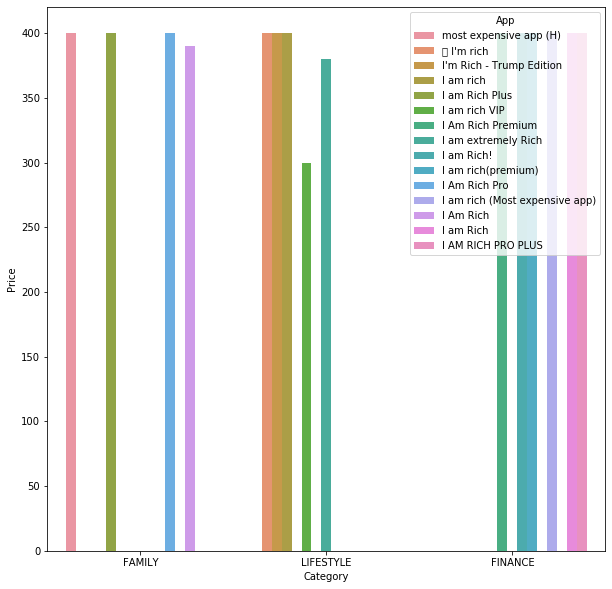

In [144]:
plt.figure(figsize=(10,10))
sns.barplot(x='Category', y='Price', hue='App', data=expensive_app)
plt.show

**As we can see more than 6,000 apps are free, only around 500 are paid**:
1. To actually decide to go free or not we should define which category that we choose to be. 
2. If we decide to go for paid app, what is the elements of the paid app that make them payable?

## Conclusion

**This is just a short and demo version of data analysis, which focus on two main things:**
1. Data cleaning, which is the very first and important step toward visualizing and studying insights from data.
2. Data visualization, since we as human work much better with visual data rather than bunch of data in the csv format.  

**I hope that you enjoy the code and the visual of this practice. More will be update later.**